# GPcounts applied to scRNA-Seq time series data

Nuha BinTayyash, 2020

GPcounts is a Gaussian process regression package for counts data with negative binomial and zero-inflated negative binomial likelihoods as described in the paper "Non-parametric modelling of temporal and spatial counts data from RNA-seq experiments".


This notebook shows how to fit GPcounts with zero-inflated negative binomial, negative binomial and Gaussian likelihoods using full inference on ScRNA-seq gene expression data in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset to find differentially expressed genes using infer trajectory and compare it with GPcounts with sparse inferece to obtain to obtain computational efficiency.

In [1]:
import pandas as pd
import numpy as np
import gpflow 
from IPython.display import display

Load $\alpha$ gene expression data and pseudotime information

In [2]:
Y = pd.read_csv('../data/normalized_alpha_counts.csv',index_col=[0])
X = pd.read_csv('../data/alpha_time_points.csv',index_col=[0])

In [3]:
from GPcounts.GPcounts_Module import Fit_GPcounts
from helper import plot 

In [4]:
genes_name = ['ENSMUSG00000015879','ENSMUSG00000059173']

Probabilty of zeros in Fam184b and Pde1a genes

In [5]:
Y.loc[genes_name][Y.loc[genes_name] == 0].count(axis=1)/len(Y.columns)

ENSMUSG00000015879    0.859756
ENSMUSG00000059173    0.628049
dtype: float64

## 1. Fit GPcounts with different negative binomial likelihood assuming full inference on Fam184b and Pde1a genes

In [6]:
gp_counts = Fit_GPcounts(X,Y.loc[genes_name],safe_mode = True) 
likelihoods = ['Zero_inflated_negative_binomial','Negative_binomial','Gaussian']

100%|██████████| 2/2 [01:10<00:00, 35.13s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-354.498102,-357.560408,3.062307
ENSMUSG00000059173,-758.198315,-784.106171,25.907856


100%|██████████| 2/2 [00:04<00:00,  2.47s/it]

ENSMUSG00000015879


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.282087686144893
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.21934277109070333
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.42933143903469007
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,245.17010593001652
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[3.68701236e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[4.04093097e-01, 0.00000000e+00, 0.00000000e+00..."


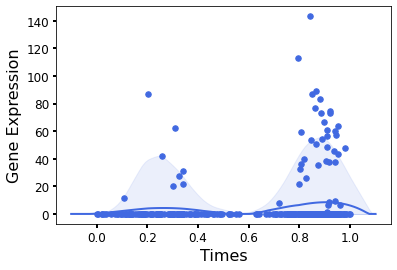

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,487.02458452632766
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.48466199289189166
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,289.6804492834449
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[1.75277377e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[-3.95190519e-03, 0.00000000e+00, 0.00000000e+00..."


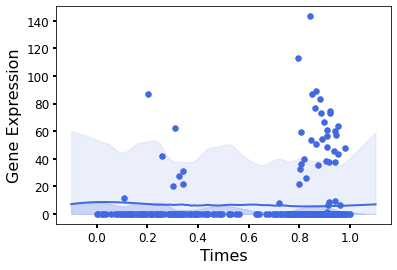

ENSMUSG00000059173


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,9.586712435888533
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.137372873407831
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2967759763652675
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,65.4722228687537
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[1.41317579e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[8.06595585e-02, 0.00000000e+00, 0.00000000e+00..."


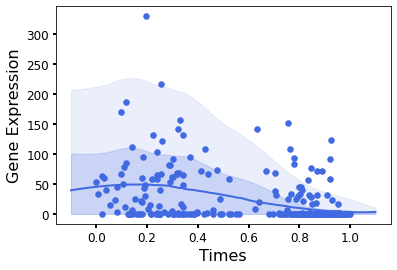

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,31.655413551541912
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2751176874933383
VGP.likelihood.km,Parameter,Softplus,,True,(),float64,92.5283467687865
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[7.03739507e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[-1.37332084e-02, 0.00000000e+00, 0.00000000e+00..."


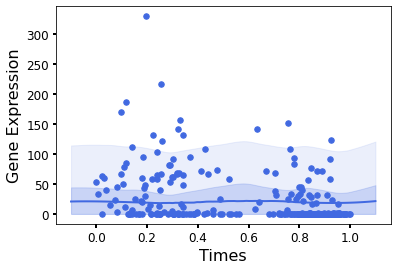

100%|██████████| 2/2 [00:11<00:00,  5.94s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-385.423242,-385.959712,0.536470
ENSMUSG00000059173,-797.367045,-807.318248,9.951203


100%|██████████| 2/2 [00:04<00:00,  2.24s/it]

ENSMUSG00000015879


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.8186780148045587
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.1410824344022714
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,32.89424608196025
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[-2.59189871e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[8.32531382e-01, 0.00000000e+00, 0.00000000e+00..."


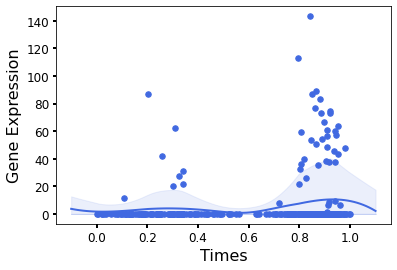

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.7226775923180533
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,35.324348221508195
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[9.86488610e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[1.63758132e-01, 0.00000000e+00, 0.00000000e+00..."


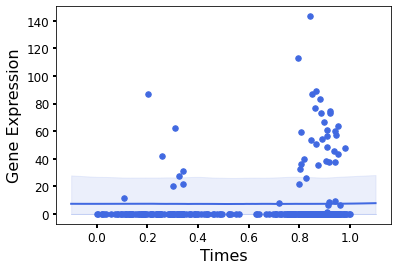

ENSMUSG00000059173


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.183566438252054
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.7696437970669783
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,10.399886267248663
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[1.27557650e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[1.93535557e-01, 0.00000000e+00, 0.00000000e+00..."


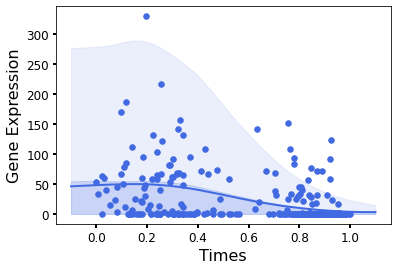

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.731413127206427
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,11.93889081845713
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(328, 1)",float64,[[9.97611578e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 328, 328)",float64,"[[[6.41775345e-02, 0.00000000e+00, 0.00000000e+00..."


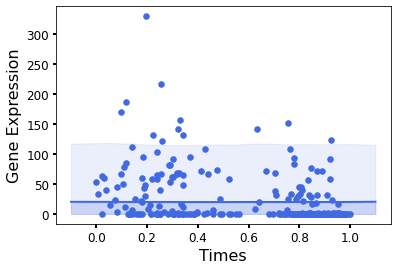

100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-551.722537,-554.274201,2.551665
ENSMUSG00000059173,-623.552579,-663.040231,39.487652


100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

ENSMUSG00000015879


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.33384
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.00389
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.66186


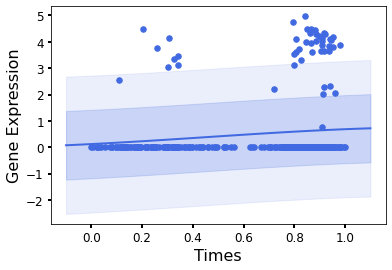

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.254744
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.69877


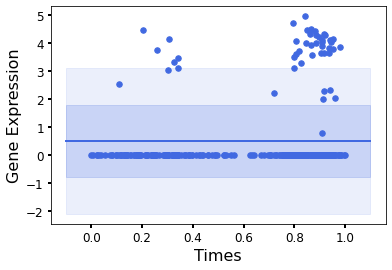

ENSMUSG00000059173


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.44783
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1664
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.53578


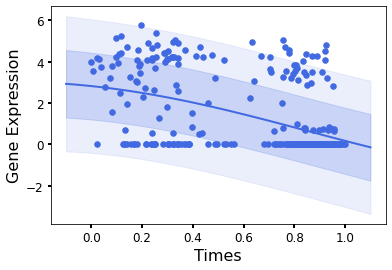

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.42893
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,3.28677


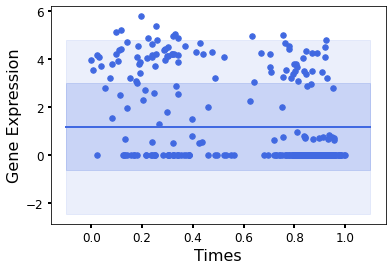

In [7]:
test_name = 'One_sample_test' # name of the test

for likelihood in likelihoods:
    results = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood)
    plot(params,X.values,Y.loc[genes_name])

## 2. Fit GPcounts with different likelihoods assuming sparse inference  to obtain computational efficiency  on Fam184b and Pde1a genes

100%|██████████| 2/2 [00:15<00:00,  7.58s/it]

The results for Zero_inflated_negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-354.510375,-357.566388,3.056013
ENSMUSG00000059173,-758.196405,-784.107533,25.911129


100%|██████████| 2/2 [00:04<00:00,  2.10s/it]

ENSMUSG00000015879


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.23131008769608
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.21889035319534025
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.42954023506259575
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,239.8612507894008
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[1.05290573e+00...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[1.45693319e-01, 0.00000000e+00, 0.00000000e+00..."


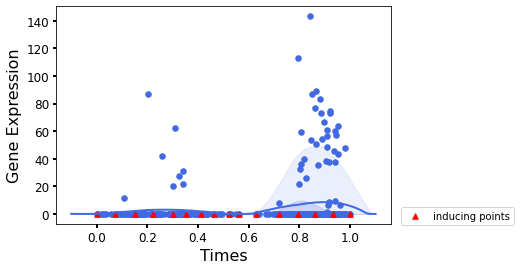

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,493.0386931211742
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.4846804077278373
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,289.63341071149574
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[0.17420433...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-3.92760098e-03, 0.00000000e+00, 0.00000000e+00..."


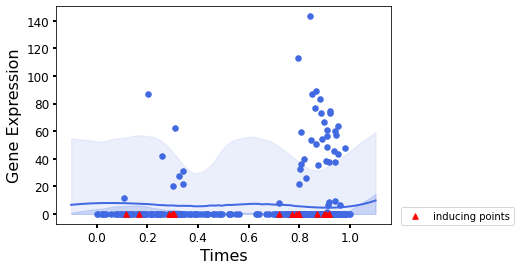

ENSMUSG00000059173


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,10.047332512305184
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1483533332599067
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.2938919682622338
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,65.98182436605661
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[1.14872393e+00...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[3.48493869e-02, 0.00000000e+00, 0.00000000e+00..."


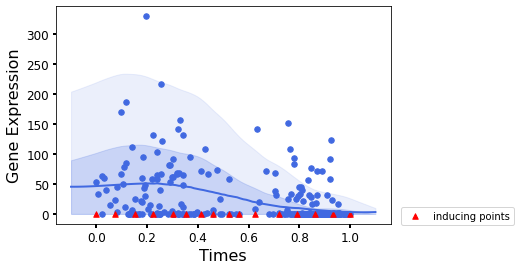

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,31.828925975571384
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.275155386992523
SVGP.likelihood.km,Parameter,Softplus,,True,(),float64,92.53178974520546
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[7.01825511e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[-1.37030253e-02, 0.00000000e+00, 0.00000000e+00..."


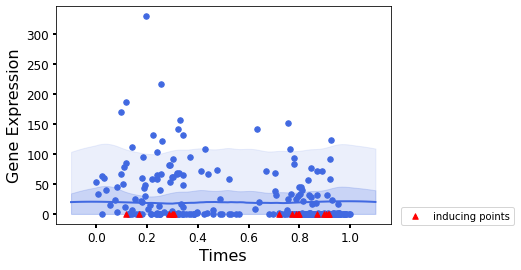

100%|██████████| 2/2 [00:07<00:00,  3.53s/it]

The results for Negative_binomial likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-385.423247,-385.959709,0.536462
ENSMUSG00000059173,-797.366947,-807.318240,9.951293


100%|██████████| 2/2 [00:04<00:00,  2.26s/it]

ENSMUSG00000015879


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.820294454112077
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.14103802128495696
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,32.88947544894336
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[3.86833859e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[5.54705445e-01, 0.00000000e+00, 0.00000000e+00..."


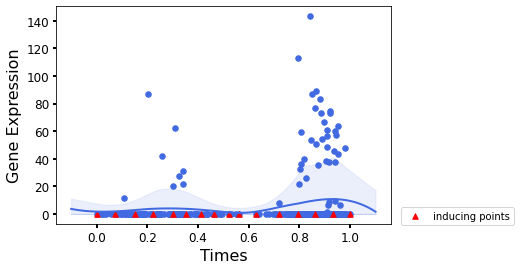

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.722771623840931
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,35.32479488323072
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.86467580e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[1.63758101e-01, 0.00000000e+00, 0.00000000e+00..."


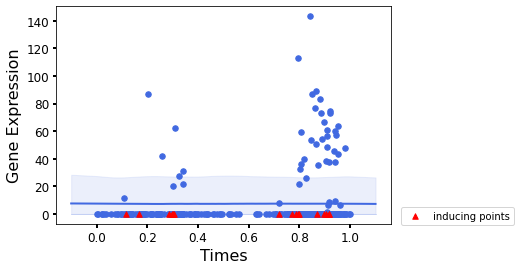

ENSMUSG00000059173


name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.036853837484564
SVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.766130719333926
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,10.398632463190738
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.29761857e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[8.55673335e-02, 0.00000000e+00, 0.00000000e+00..."


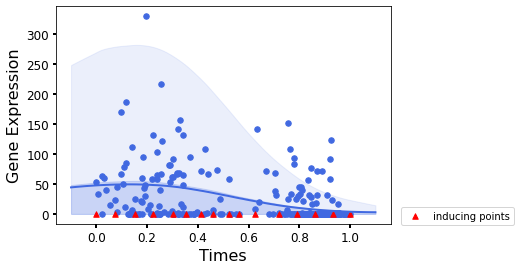

name,class,transform,prior,trainable,shape,dtype,value
SVGP.kernel.variance,Parameter,Softplus,,True,(),float64,8.725946227022561
SVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,11.939130823045273
SVGP.likelihood.scale,Parameter,,,False,(),float64,1.0
SVGP.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...
SVGP.q_mu,Parameter,,,True,"(16, 1)",float64,[[9.97939492e-01...
SVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 16, 16)",float64,"[[[6.42114870e-02, 0.00000000e+00, 0.00000000e+00..."


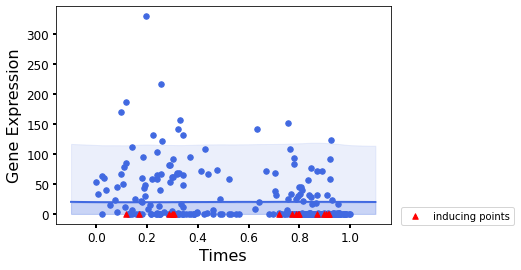

100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

The results for Gaussian likelihood:


,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000015879,-551.722568,-554.274207,2.551639
ENSMUSG00000059173,-623.552600,-663.040234,39.487634


100%|██████████| 2/2 [00:02<00:00,  1.24s/it]

ENSMUSG00000015879


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.33382418815948744
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0037887135570565
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6618984712077192
SGPR.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...


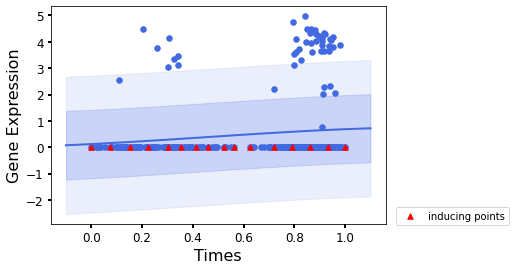

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,0.2547441213793411
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.6987717753452374
SGPR.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...


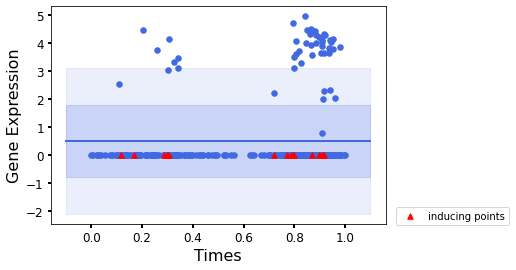

ENSMUSG00000059173


name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,6.46093669998511
SGPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.1678477536024725
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,2.5356320358231565
SGPR.inducing_variable.Z,Parameter,,,True,"(16, 1)",float64,[[0.71943149...


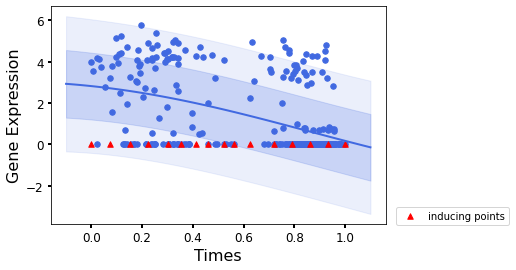

name,class,transform,prior,trainable,shape,dtype,value
SGPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.4289333751494782
SGPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,3.2867712594890457
SGPR.inducing_variable.Z,Parameter,,,False,"(16, 1)",float64,[[0.71943149...


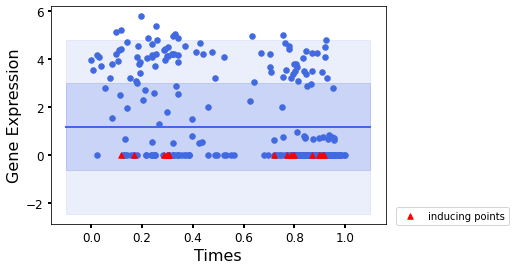

In [8]:
sparse = True 
gp_counts = Fit_GPcounts(X,Y.loc[genes_name], M= 16,sparse = sparse,safe_mode = True) # use sparse inference

for likelihood in likelihoods:
    results_sparse = gp_counts.One_sample_test(likelihood)
    print('The results for '+likelihood+' likelihood:')
    display(results_sparse)
    params = gp_counts.load_predict_models(genes_name,test_name,likelihood)
    plot(params,X.values,Y.loc[genes_name],sparse)